# Programação e Análise de Dados com Python
##### Programa de Pós-Graduação em Economia - PPGE

## Aula 12 - Importação e exportação de arquivos de dados

###### Prof. Hilton Ramalho
###### Prof. Aléssio Almeida

## Objetivo
Explorar as principais funções de leitura/carga de dados e atributos de planilhas
 de dados (data frames)

## Conteúdo
1. Arquivos
    - geração de arquivos
    - leitura e escrita
    - diretórios e subdiretórios
    - datetime

2. Introdução ao objeto data frame
    - entrada de dados
    - seleção e ajustes de colunas
    - operações de entrada

3. Leitura de dados

<a name="bibliotecas"></a>
# Arquivo

- A função `open`
- Representa uma área do disco no qual podemos ler e gravar informações
- Modos de abertura de arquivos de dados

|modo|operações|
|:--:|:--|
|r|leitura|
|w|escrita (com sobrescrita)|
|a|escrita (empilha dados já existentes)|
|b|modo binário|
|+|atualização (leitura e escrita)|

- Os modos podem ser combinados: `r+` ou `w+b`





# Montar pasta de arquivos do seu Google Drive

- Vamos compartilhar arquivos de dados uma pasta do Google Drive 
- Poderemos montá-la a cada sessão iniciada por um usuário 

- Rodar o procedimento abaixo, clicar no link do seu Gdrive, copiar o código de autorização e colar.

- Conta adminstrativa `lemaufpb.courses@gmail.com` - compartilhando o drive DS-PY com todos os alunos do curso.

In [ ]:
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


- Observe na pasta da barra lateral à esquerda:
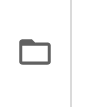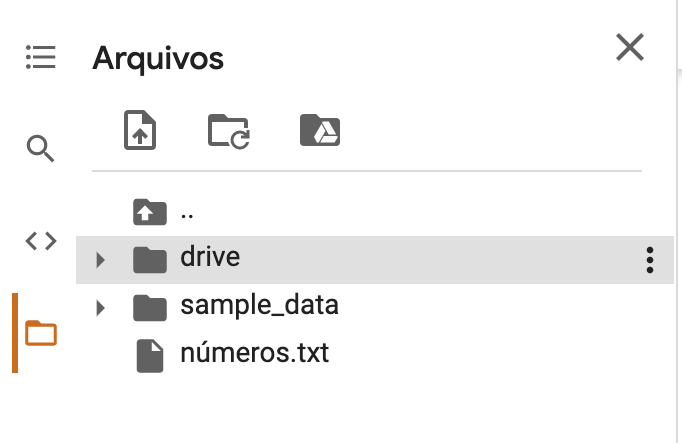 

# Desmontar pasta de arquivos do seu Google Drive


In [ ]:
from google.colab import drive
drive.flush_and_unmount()

#### Trabalhando com arquivos no Colab

- [https://neptune.ai/blog/google-colab-dealing-with-files](https://neptune.ai/blog/google-colab-dealing-with-files)


## A Função `open`

- Essa função será usada para ler e escrever os dados em um arquivo.
- Os métodos `write`, `read` e `close` são usados para definir o que queremos fazer com o arquivo.
- **Importante**: o fechamento do arquivo é fundamental para não consumir recursos computacionais desnecessariamente.

## Sintaxe básica

```
open(<caminho do arquivo>, modo)
```

Obs: modo='r' (leitura), modo='w' (escrita)

## Meu primeiro arquivo

- Arquivo do tipo texto -  extensão ".txt"

**Exemplo**: **Persitência de dados no disco do computador** - vamos criar um arquivo com números de 1 a 10.

In [ ]:
# Abrir arquivo em branco em modo de escrita - w - write
open("/content/drive/Shareddrives/DS-PY/numeros.txt", mode="w")

<_io.TextIOWrapper name='/content/drive/Shareddrives/DS-PY/numeros.txt' mode='w' encoding='UTF-8'>

In [ ]:
# Criamos um arquivo em branco em modo de escrita - 
# atribuimos a conexão ao objeto conexao
conexao = open("/content/drive/Shareddrives/DS-PY/numeros.txt", mode="w")

# Criar uma lista de dados
lista = range(1, 11, 1)
print(list(lista))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
 # Looping sobre lista de números
for i in lista:
  # Escrever cada número em uma linha do arquivo
  conexao.write(f"{i}\n")

# Fechar conexão com arquivo 
# Gravamos os dados de forma permanence no disco   
conexao.close()

## Leitura do arquivo
### Função `open`

- Modo 'r' (leitura) é o padrão.
- No objeto de conexão (open), temos o método .readLines()

Exemplo: vamos ler o conteúdo do arquivo `numeros.txt`.

In [ ]:
# Abrir uma conexão de leitura - arquivo deve existir
# Modo de leitura é padrão - r - read
conexao = open("/content/drive/Shareddrives/DS-PY/numeros.txt")
print(conexao)

<_io.TextIOWrapper name='/content/drive/Shareddrives/DS-PY/numeros.txt' mode='r' encoding='UTF-8'>


In [ ]:
# Leitura dos dados - ler linha por linha
for i in conexao.readlines():
  print(i)

# Fechamos a conexão com o arquivo
conexao.close()

## Lendo o arquivo: modo alternativo
### Operador `with`

- Com o operador `with` não precisamos nos preocupar em fechar a conexão com arquivo

### Sintaxe

```
with open(<caminho>) as <apelido da conexão>:
  # Escopo
  for i in <apelido>.readlines():
    print(i)
```


In [ ]:
# Leitura das linhas do arquivo
with open("/content/drive/Shareddrives/DS-PY/numeros.txt") as conexao:
  # Escopo do with
  for i in conexao.readlines():
    print(i)



<a name='exercicios'> </a>
# Exercício

1- Crie dois arquivos (pares.txt e impares.txt) que distribua entre si números de 0 a 100 entre pares e ímpares.


In [ ]:
# Duas conexões aninhadas - criamos dois arquivos
with open("/content/drive/Shareddrives/DS-PY/pares.txt", mode="w") as pares:
  # Escopo da primeira
  with open("/content/drive/Shareddrives/DS-PY/impares.txt", mode="w") as impares:
    # Escopo da segunda conexão
    # Loop com regra de decisão para escrita de linhas
    for i in range(101):
      # testar se i é par
      if (i % 2 == 0):
        pares.write(f'{i}\n')
      else:
        impares.write(f'{i}\n')

## Usando o modo append

- O modo de abertura de arquivos `a` permite adicionar dados a um arquivo já existente.

In [ ]:
# Criamos um arquivo - modo write
with open("/content/drive/Shareddrives/DS-PY/append-example.txt", mode="w") as f:
  for i in range(5):
    f.write(f'{i}\n')

In [ ]:
# Abrimos o arquivo e adicionamos dados - modo append
with open("/content/drive/Shareddrives/DS-PY/append-example.txt", mode="a") as f:
  for i in range(6,11,1):
    f.write(f'{i}\n')

<a name='dir'> </a>
# Gerenciamento de diretórios e arquivos

- Manipular diretórios: alterar, apagar...
- Verificar infromações sobre o arquivo

O pacote `os` permite efetuar ações nos diretórios e arquivos do sistema operacional do usuário.

# Pacote `os`

- Documentação [https://docs.python.org/pt-br/3/library/os.html](https://docs.python.org/pt-br/3/library/os.html)

**Exemplo** - Verificar diretório atual de trabalho

In [ ]:
# Importamos o pacote os
import os

# Usamos o método .getcwd()
os.getcwd()

'/content'

##### Exemplo - Criar um arquivo no diretório de trabalho

In [ ]:
# Vamos criar um arquivo no diretório raiz (diretório trabalho)
with open("teste.txt", mode="w") as f:
  for j in range(10):
    f.write(f'{j}\n')

### Método `.chdir`

- Permitir alterar o diretório de trabalho.

**Exemplo** - **Alterar diretório de trabalho** para nossa pasta compartilhada no Gdrive.
- Para tanto, usaremos o método `.chdir`.

In [ ]:
# Importar o pacote os
import os

# Mudando diretório de trabalho
os.chdir('/content/sample_data/')

# Checar qual é o diretório de trabalho
os.getcwd()

'/content/sample_data'

In [ ]:
# Ler os dados de cada linha do arquivo - california_housing_test.csv
with open("california_housing_test.csv", "r") as arquivo:
  for i in arquivo.readlines():
    print(i)

**Exemplo** - Lendo linhas de arquivo a partir do novo diretório de trabalho compartilhado no Gdrive.

In [ ]:
# Importação seletiva do método chdir
from os import chdir, getcwd

# Mudando diretório de trabalho
chdir('/content/drive/Shareddrives/DS-PY/')

# Checamos o diretório de trabalho
getcwd()

'/content/drive/Shareddrives/DS-PY'

In [ ]:
# Leitura das linhas do arquivo no diretório de trabalho
with open("numeros.txt", "r") as f:
  for i in f.readlines():
    print(i)

**Exemplo** - Criando um novo diretório a partir do diretório de trabalho.
- Para tanto usamos o método `.mkdir()`.

In [ ]:
# Importamos
import os

# Checar o diretório de trabalho
os.getcwd()

'/content/drive/Shareddrives/DS-PY'

In [ ]:
# Criar um novo diretório dentro do diretório de trabalho
os.mkdir('teste')

#### Método `.rmdir`

- Deleta diretório

In [ ]:
# Deletar o diretório
os.rmdir('teste')

**Exemplo** - Listando arquivos e diretórios a partir do diretório de trabalho.
- Usaremos o método `.listdir()`.

In [ ]:
# Importar o pacote os
import os

# Diretório de trabalho
print(os.getcwd())

# Listando arquivos e diretórios
os.listdir()

**Exemplo** - Renomear arquivos e diretórios a partir do diretório de trabalho.

- Para renomear um diretório usamos o método `.rename()`.

In [ ]:
# Criar um arquivo teste.txt
with open("teste.txt", mode="w") as f:
  f.write("Olá Mundo!")

In [ ]:
# Renomear o diretório
os.rename('teste.txt', 'aula01.txt')

# Lista o conteúdo do diretório de trabalho
os.listdir()

**Exemplo** - Remover arquivos e diretórios a partir do diretório de trabalho.

- Usamos o método `.rmdir()` - remove diretórios e arquivos
- O método `.remove()` - remove arquivos.


In [ ]:
# Vamos criar um diretório
import os

# Criar o diretório
os.mkdir("teste")


In [ ]:
# apagando diretórios
os.rmdir('teste')
# listando arquivos
os.listdir()

In [ ]:
# apagando arquivos
os.remove('numeros.txt')
# listando arquivos
os.listdir()

## Trabalhando com o método `.path`

- Ele possui vários submétodos para trabalhar diretórios e arquivos.

In [ ]:
# Importar o pacote os
import os

help(os.path)

**Exemplo** - Testar a existência de arquivos e diretórios a partir do diretório de trabalho.

In [ ]:
# Testar se um arquivo existe

print(os.getcwd())

# Regra de decisão
if os.path.exists('pares.txt') is True:
  print('Arquivo existe')
else:
  print('Arquivo não existe')

/content/drive/Shareddrives/DS-PY
Arquivo existe


In [ ]:
# Vamos deletar o arquivo
os.remove("pares.txt")

In [ ]:
# Regra de decisão
if os.path.exists('pares.txt') is True:
  print('Arquivo existe')
else:
  print('Arquivo não existe')

Arquivo não existe


**Exemplo** - Uso de caminhos - caminhos absolutos, caminhos relativos, concatenação.

- Usamos o método `.path` do pacote `os`, além dos submétodos:
  - `.path.abspath` - caminho absoluto
  - `.path.relpath` - camilho relativo
  - `.path.basename` - último diretório do caminho

  - Outros métodos vide:
```
import os
help(os.path)
```

**Exemplo** - Outros submétodo do `os.path`:

- `os.path.abspath` - caminho absoluto

In [ ]:
# Uso de caminhos
import os

caminho = '/content/drive/Shareddrives/DS-PY'

# retorna o caminho absoluto
os.path.abspath(caminho)

'/content/drive/Shareddrives/DS-PY'

**Exemplo** - Outros submétodo do `os.path`:

- `os.path.relpath()` - caminho relativo

In [ ]:
# retorna o caminho relativo
os.path.relpath(caminho)

# Exemplo: Linux - caminho relativo "~/" o caminho absoluto "/home/usuario"

'.'

**Exemplo** - Outros submétodo do `os.path`:

- `os.path.basename()` - último sub-diretório do caminho

In [ ]:
print(os.path.basename(caminho))

DS-PY


In [ ]:
print(os.path.basename(caminho))
print(os.path.dirname(caminho))
print(os.path.split(caminho))
print(os.path.splitext('dados_gastos.xlsx'))
print(os.path.join(caminho, 'dados_gastos.xlsx'))

DS-PY
/content/drive/Shareddrives
('/content/drive/Shareddrives', 'DS-PY')
('dados_gastos', '.xlsx')
/content/drive/Shareddrives/DS-PY/dados_gastos.xlsx


**Exemplo** - Outros submétodo do `os.path`:

- `os.path.join()` - concatenação de caminhos

In [ ]:
print(caminho)
os.path.join(caminho,"sales.xlsx")

/content/drive/Shareddrives/DS-PY


'/content/drive/Shareddrives/DS-PY/sales.xlsx'

# Gerenciamento de datas e horários

- Usando o módulo `time` podemos agregar informações sobre a geração de arquivos.
- Documentação - [https://docs.python.org/pt-br/3/library/time.html?highlight=time#module-time](https://docs.python.org/pt-br/3/library/time.html?highlight=time#module-time)

**Exemplo** - Informações de arquivos a partir do diretório de trabalho. Também usamos o módulo `time`.

- O método `.stat` do pacote `os` permite obter informações sobre determinado arquivo.
- Esse método retorna uma coleção com informações, dentre elas: `st_size` (tamanho do arquivo), `st_ctime` (data e horário de criação), `st_mtime` (data e horário de modificação) e `st_atime` (data e horário de acesso).
- Os horários seguem o padrão universal UTC.

#### Método `os.stat`

- Estásticas de um arquivo de dados.

In [ ]:
# Detalhes de um arquivo
import os

# Diretório de trabalho
print(os.getcwd())

info = os.stat('impares.txt')
info

/content/drive/Shareddrives/DS-PY


os.stat_result(st_mode=33152, st_ino=79, st_dev=36, st_nlink=1, st_uid=0, st_gid=0, st_size=145, st_atime=1638448009, st_mtime=1638447999, st_ctime=1638448009)

**Exemplo** - Usamos o pacote `time` e o método `.ctime` para converter as informações de **data/horário de timestamp para leitura humana**.

- Um **timestamp** basicamente representa um instante único, um ponto específico na linha do tempo, e seu valor corresponde a uma determinada quantidade de tempo decorrida a partir de um instante inicial.

In [ ]:
# Importar o pacote time
import time

# Usamos o método .ctime para converter de timestamp para humano
print(f'Criado: {time.ctime(info.st_ctime)}')

Criado: Thu Dec  2 12:26:49 2021


In [ ]:
# Importar o pacote time
import time

# Informações do arquivo
print(info)

# Usamos o método .ctime para a conversão
print(f'Tamanho em Kb: {info.st_size/1000} kB')
print(f'Criado: {time.ctime(info.st_ctime)}')
print(f'Modificado: {time.ctime(info.st_mtime)}')
print(f'Acessado: {time.ctime(info.st_atime)}')

os.stat_result(st_mode=33152, st_ino=79, st_dev=36, st_nlink=1, st_uid=0, st_gid=0, st_size=145, st_atime=1638448009, st_mtime=1638447999, st_ctime=1638448009)
Tamanho em Kb: 0.145 kB
Criado: Thu Dec  2 12:26:49 2021
Modificado: Thu Dec  2 12:26:39 2021
Acessado: Thu Dec  2 12:26:49 2021


## O método `.time`

- O método `.time` permite acessar obter data, hora atual em segundos, usando UTC **Tempo Universal Coordenado** a partir do **Meridiano de Greenwich**. 
- Meridiano de Greenwich [https://pt.wikipedia.org/wiki/Meridiano_de_Greenwich](https://pt.wikipedia.org/wiki/Meridiano_de_Greenwich)
- UTC - [https://time.is/pt_br/UTC](https://time.is/pt_br/UTC)
- O resultado é representado na codificação timestamp.

In [ ]:
# Importar com apelido
import time as t

# Chamar o método time - horário e data corrente - UTC 
# em TimeStamp
t.time()

1638455175.8291323

In [ ]:
# Importar com apelido
import time as t

# Retorna a hora atual em segundos, 
# usando UTC (tempo universal coordenado) ou Meridiano de Greenwich
agora = t.time()
# Horário em timestamp (linguagem da máquina)
agora

1638455268.3767266

## O método `.ctime`

- Possibilita a conversão de um resultado codificado em timestamp para a leitura humana.

In [ ]:
# Importar com apelido
import time as t

# Retorna a hora atual em segundos, usando UTC (tempo universal coordenado) ou Greenwich
agora = t.time()
print(agora)

# Conversão de timestamp para linguagem humana
converter = t.ctime(agora)
print(converter)

1638455332.968899
Thu Dec  2 14:28:52 2021


## O método `.gmtime`

- Converte um resultado timestamp para uma coleção que permite acessar e manipular informações sobre: ano, mês, dia, hora, minutos, segundos.

In [ ]:
# Importar com apelido
import time as t

# Retorna a hora atual em segundos, usando UTC (tempo universal coordenado) ou Greenwich
# Timestamp
agora = t.time()
print(agora)

# Conversão timestamp em uma tupla de 9 elementos com a hora do fuso local
data = t.gmtime(agora)
print(data, type(data))


1638455532.7355978
time.struct_time(tm_year=2021, tm_mon=12, tm_mday=2, tm_hour=14, tm_min=32, tm_sec=12, tm_wday=3, tm_yday=336, tm_isdst=0) <class 'time.struct_time'>


**Exemplo** - Acessando elementos de uma coleção `gmtime`.

In [ ]:
# Importar time
import time as t

# Data/horário UTC - retorna em formato timestamp
agora = t.time()

# Conversão de timestamp para uma coleção de componentes
agora = t.gmtime(agora)

# Dicionário de componentes data/horário
print(agora)

# Podemos consultar de forma similar a um dicionário
print(agora.tm_year)
print(agora.tm_mon)
print(agora.tm_mday)
print(agora.tm_wday)

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=2, tm_hour=14, tm_min=34, tm_sec=14, tm_wday=3, tm_yday=336, tm_isdst=0)
2021
12
2
3


## Formatação de datas e horários

- O método `.strftime()` permite formatar um objeto `gmtime` em uma `string`.
- As coleções `gmtime` podem ser formatadas seguindo os códigos da tabela abaixo:

|Código|Descrição|
|---|---|
|%a | dia da semana abreviado|
|%A | dia da semana|
|%b | nome do mês abreviado |
|%B | nome do mês |
|%d | dia do mês |
|%j | dia do ano |
|%m | mês (01-12) |
|%w | dia da semana (0-6), 0 é domingo |
|%W | número da semana (00-53) |
|%y | ano (00-99)|
|%Y | ano com 4 dígitos|
|%p | AM ou PM |


**Exemplo** - formatar data/horário local.

- Usamos o método `.strftime()`.

In [ ]:
# Se não passarmos argumento, o método .gmtime() retorna data e horário UTC 
# colecionados em linguagem humana

In [ ]:
# Importar o pacote time
import time as t

# Pegar o horário UTC em estrutra de tupla
horario = t.gmtime()
print(horario)

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=2, tm_hour=14, tm_min=37, tm_sec=51, tm_wday=3, tm_yday=336, tm_isdst=0)


In [ ]:
# Formatar para linguagem humana usando código de formatação
formatado = t.strftime("%A, %d de %B de %Y", horario)
print(formatado)

quinta, 02 de dezembro de 2021


In [ ]:
# Formatar para linguagem humana usando código de formatação
print(horario)
formatado = t.strftime("%d/%m/%Y %H:%M", horario)
print(formatado)

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=2, tm_hour=14, tm_min=37, tm_sec=51, tm_wday=3, tm_yday=336, tm_isdst=0)
02/12/2021 14:37


In [ ]:
# Importar o pacote time
import time as t

# Pegar o horário UTC em estrutra de dicionário
horario = t.gmtime()
print(horario)

# Formatar para linguagem humana usando código de formatação
formatado = t.strftime("Hoje é %d/%m/%Y", horario)
print(formatado)

time.struct_time(tm_year=2021, tm_mon=12, tm_mday=2, tm_hour=14, tm_min=42, tm_sec=29, tm_wday=3, tm_yday=336, tm_isdst=0)
Hoje é 02/12/2021


**Exemplo** - usar configurações locais do seu computador para converter os resultados para Português do Brasil.

- Usamos o pacote `locale` e o método `.setlocale`.

In [ ]:
# Configuração do Linux
! sudo apt-get install locales -y
! export LC_ALL="pt_BR.UTF-8"
! locale-gen en_US en_US.UTF-8 pt_BR.UTF-8
! dpkg-reconfigure locales
! locale -a

In [ ]:
# Reiniciar ambiente de execução no Colab

# Importamos o pacote time
import time as t

# Importamos o pacote locale
import locale

# Converte os locales
locale.setlocale(locale.LC_ALL, "pt_BR.UTF-8")

# Imprimir data/horário UTC
t.strftime("%A, %d de %B de %Y às %Hh%M", t.gmtime())

'quinta, 02 de dezembro de 2021 às 14h46'

## Gerenciamento de datas e horários

- O módulo `datetime` possui vários métodos para manipulação de datas e horas. É uma alternativa ampliada do pacote `time`.

## O método `.date` e submétodo `.today`

- Esses métodos permitem acessar a data atual do sistema operacional.

In [ ]:
# Importar o datetime com apelido
import datetime as dt

# O método .date e submétodo .today
agora = dt.date.today()

# Imprimir objeto e tipo
print(agora, type(agora))

2020-10-29 <class 'datetime.date'>


## O método `.datetime` e submétodo `.now`

- Esses métodos permitem acessar a data e horário correntes do sistema operacional.

In [ ]:
# Importar o datetime com apelido
import datetime as dt

# Pegar data e horário atual UTC
# Método .datetime e submétodo .now()
data = dt.datetime.now()

# Imprimir o objete datetime
print(data, type(data))

2020-10-29 13:24:52.167763 <class 'datetime.datetime'>


## O método `.date`

- Permite a conversão de um objeto `datetime` para um objeto `date`.

In [ ]:
# Importar o datetime com apelido
import datetime as dt

# Pegar data e horário atual UTC
# Método .datetime e submétodo .now()
data = dt.datetime.now()
print(data)

# Usar o método .date para converter datetime para date
data = data.date()

# Objeto datetime
print(data)


2020-10-29 13:26:00.313480
2020-10-29


In [ ]:
# Formatar impressão
print(data, type(data))

2020-10-29 <class 'datetime.date'>


**Exemplo** - podemos acessar os componentes de um objeto datetime ou date.
 - Submétodos `day`, `month`, `year` etc.

In [ ]:
# Importar o datetime com apelido
import datetime as dt

# Pegar data e horário atual UTC
# Método .datetime e submétodo .now()
data = dt.datetime.now()
print(data)

# dia da semana iniciada na segunda - tupla
data.year, data.month, data.weekday(), data.isoweekday()

2020-10-29 13:28:58.477670


(2020, 10, 3, 4)

In [ ]:
# dia da semana iniciada no domingo - tupla
data.year, data.month, data.isoweekday()

(2020, 10, 4)

**Exemplo** - formatar o objeto datetime ou date para o padrão ISO.

In [ ]:
# dia da semana iniciada no domingo
data.isoformat()

'2020-10-29'

**Exemplo** - criando um objeto date ou datetime.

- Usaremos o método `.datetime`.

In [ ]:
# Importar o pacote datetime com apelido
import datetime as dt

# Chamar o método datetime e passar parâmetros
data = dt.datetime(year=2029, month=1, day=30, hour=13, minute=12, second=35)
data

datetime.datetime(2029, 1, 30, 13, 12, 35)

**Exemplo** - acessando componentes do objeto date ou datetime.

In [ ]:
# Acessar os componentes
print(data.year)
print(data.month)
print(data.day)
print(data.hour)

2029
1
30
13


## Formatando objetos datetime

- Usamos o método `.strftime` para formatar um objeto date time para string,
usando os código da tabela abaixo:

|Código|Descrição|
|---|---|
|%a | dia da semana abreviado|
|%A | dia da semana|
|%b | nome do mês abreviado |
|%B | nome do mês |
|%d | dia do mês |
|%j | dia do ano |
|%m | mês (01-12) |
|%w | dia da semana (0-6), 0 é domingo |
|%W | número da semana (00-53) |
|%y | ano (00-99)|
|%Y | ano com 4 dígitos|
|%p | AM ou PM |

**Exemplo** - criamos um objeto datetime e formatamos para uma string.

In [ ]:
# Importar pacote
import datetime as dt

# Criando um objeto datetime
data = dt.datetime(year=2019, month=1, day=30, hour=2, minute=5, second=2)
print(data)

# Convertemos para string formatada
d = data.strftime("%d-%m-%Y")
print(d)

# Convertemos novamente
print(data.strftime("%A, %d de %B de %Y"))

# Convertemos novamente
print(data.strftime("%A, %d de %B de %Y às %Hh:%Mmin:%Ss"))

2019-01-30 02:05:02
30-01-2019
quarta, 30 de janeiro de 2019
quarta, 30 de janeiro de 2019 às 02h:05min:02s


**Exemplo** - calculando diferenças entre datas e horários.

- Usamos o método `.timedelta` do pacote `datetime`.

In [ ]:
# Importar pacote
import datetime as dt

# Criando um objeto datetime
data_inicial = dt.datetime(year=2019, month=1, day=30, hour=2, minute=5, second=2)
print(data_inicial)

# Criando um objeto datetime com valores atuais
data_hoje = dt.datetime.now()
print(data_hoje)

# Calculando a diferença
dif = data_hoje - data_inicial
print(dif)


2019-01-30 02:05:02
2020-10-29 13:45:11.155514
638 days, 11:40:09.155514


- Usamos o método `.timedelta` para somar/subtrair tempo.

In [ ]:
# Importar pacote
import datetime as dt

# Criando um objeto datetime com valores atuais
data_hoje = dt.datetime.now()
print(data_hoje)

# Data atual mais 60 dias
soma = data_hoje + dt.timedelta(days=14)
print(soma)

# Subtrair
sub = data_hoje - dt.timedelta(days=17, hours=3)
print(sub)

2020-10-29 13:49:13.058823
2020-11-12 13:49:13.058823
2020-10-12 10:49:13.058823


# Dados... Um pouco de história

## Evolução dos Modelos de Bases de Dados e Tecnologia da Informação

### 1) Coleção de Dados e Criação de Bases de Dados (até anos 1960)

- Processamento Primitivo de Arquivos

### 2) Sistemas de Gerenciamento de Bases de Dados (entre 1970 e 1980)

- Modelos hierárquicos e de redes
- Modelos relacionais (relação orientada por entidades)
- Linguagens de consultas SQL, etc
- Interfaces de usuário, relatórios, formulários...
- Métodos otimizados de consulta, transações, recuperação e integridade
- Processos de transação on-line (OLTP)

### 3) Sistemas Avançados de Bases de Dados (desde metade dos anos 1980)

- Modelos de bases de dados (relacionamentos amplos, orientados a objetos, etc)
- Aplicações avançadas (espacial, temporal, multimídia, fluxos, análise científica, etc)

### 4) Análise Avançada: Armazém de Dados e Mineração (desde o final dos anos 1980)

- Armazém de Dados (Data Warehouse) e Processamento Analítico On-line (OLAP)
- Descoberta de conhecimento (métodos de mineração de dados): generalização, classificação,associação, clusterização, padrões frequentes, outliers, tendências etc.
- Mineração avançada: mineração de fluxos de dados, bio-data, textos, séries de tempo, Web mining, etc.

### 5) Bases de Dados WEB (desde os anos 1990)

- Modelos de bases de dados XML (eXtensible Markup Language)
- Integração com retenção de informações
- Integração entre dados e informações
- Formato de arquivo JSON (Objeto em linguagem JavaScript)

### 6) Nova Geração de Dados Integrados e Sistemas de Informações (presente/futuro)

- Sistemas Avançados de Bases de Dados: Modelos semiestruturados/não relacionais (XML,noSQL,etc), modelos de armazenamento por colunas (parquet)
- Sistemas Avançados de Processamento e Armazenamento distribuídos de Big Data (larga escala de dados):
        - Sistemas gerais baseados em processamento distribuído (Spark, MapReduce)
        - Armazenamento distribuído (HDFS)
- Aprendizagem de Máquina e Inteligência Artificial: Treinamento de algoritmos com técnicas de mineração de Big Data
        - Sistemas autônomos de decisões orientados por treinamento de máquinas
        - Modelos probabilísticos de causalidade integrados com métodos de mineração de Big Data




# Leitura e Manipulação de Planilhas de Dados usando PANDAS

- `Pandas`: é uma biblioteca `Python` usada para análise de dados, por meio de *Series* (vetor coluna) e *Data Frame* (planilha de dados com uma coleção de objetos *Series*).

## Instalação
```
pip install pandas
```

## Importação
- É uma costume entre os programadores `Python` importar o pacote `pandas` usando apelido para facilitar seu uso.
```
import pandas as pd
```

In [ ]:
# Ajuda
import pandas
help(pandas)

## Criando uma planilha de dados com pandas

- Podemos criar planilhas de dados (data frames) usando diferentes métodos.
- Contudo, sempre faremos a conversão de um objeto python para data frame usando
  o método `.DataFrame()`.
  ```
  import pandas as pd
  help(pd.DataFrame)
  ```

- Vejamos abaixo alguns exemplos.

**Exemplo** - Criando um objeto pandas data frame a partir de listas agrupadas/aninhadas.

In [ ]:
# Importar pacote pandas com apelido
import pandas as pd 

# Criamos uma lista alinhada
data = [['joão', 10], ['maria', 15], ['josé', 14]] 

# Convertemos a lista acima para um objeto data frame e atribuimos à variável df
# Nesse caso também informamos os nomes das colunas compatíveis com
# as dimensões das sublistas de dados.
df = pd.DataFrame(data, columns = ['Nome', 'Idade']) 

# Exibir dataframe
print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,Nome,Idade
0,joão,10
1,maria,15
2,josé,14


**Exemplo** - Criando um objeto pandas data frame a partir de um dicionário de listas chaveadas.

In [ ]:
# Importar pacote pandas com apelido
import pandas as pd 

# Criamos um dicionário que coleciona listas.
# Note que as chaves serão usadas como os nomes das colunas
# do data frame
data = {'Nome':['João', 'Maria', 'José', 'Carol'], 'Idade':[20, 21, 19, 18]}

# Convertemos o dicionário acima para um objeto data frame
# Nesse caso, o pandas usará as chaves como os nomes das colunas
# do data frame
df = pd.DataFrame(data) 

# Exibir dataframe
df 

,Nome,Idade
0,João,20
1,Maria,21
2,José,19
3,Carol,18


**Exemplo** - Criando um objeto pandas data frame a partir de uma lista de dicionários.

In [ ]:
# Importamos o pandas
import pandas as pd 
  
# Criamos uma lista de dicionários 
data = [{'a': 1, 'b': 2, 'c':3}, {'a':10, 'b': 20, 'c': 30}] 
  
# Convertemos o objeto para data frame
# Nesse caso, as chaves de cada dicionário devem ser as mesmas
# e serão usadas como colunas. Já cada dicionário será uma
# linha do data frame
df = pd.DataFrame(data) 
  
# Imprimimos o data frame
df 

,a,b,c
0,1,2,3
1,10,20,30


**Exemplo** - Criando um objeto pandas data frame a partir de uma lista de tuplas.

In [ ]:
# Importamos o pandas
import pandas as pd  

# Criamos uma lista de tuplas   
data = [('João', 25), ('Maria', 30), ('José', 26), ('Carol', 22)]

# Convertemos a lista acima para data frame.
# Nesse caso, como não temos chaves, devemos informar os nomes
# das colunas compatíves com a dimensão de cada tupla
df = pd.DataFrame(data, columns = ['Nome', 'Idade'])
     
# Imprimir data frame 
df  

,Nome,Idade
0,João,25
1,Maria,30
2,José,26
3,Carol,22


**Exemplo** - Criando um objeto pandas data frame com linhas indexadas.


In [ ]:
# Importar pacote pandas com apelido
import pandas as pd 

# Criamos um dicionário que coleciona listas.
# Note que as chaves serão usadas como os nomes das colunas
# do data frame
data = {'Nome':['João', 'Maria', 'José', 'Carol'], 'Idade':[20, 21, 19, 18]}

# Convertemos o dicionário acima para um objeto data frame
# Nesse caso, o pandas usará as chaves como os nomes das colunas
# do data frame
# Para indexar as linhas devemos passar uma lista com os indexadores.
# Sua dimensão deve ser a mesma das listas aninhadas acima
df = pd.DataFrame(data, index=['aluno1','aluno2', 'aluno3', 'aluno4'])

# Exibir dataframe
df 

,Nome,Idade
aluno1,João,20
aluno2,Maria,21
aluno3,José,19
aluno4,Carol,18


**Exemplo** - Criando um objeto pandas data frame com dados aleatórios.


In [ ]:
# Importamos os pacotes pandas e numpy
import pandas as pd
import numpy as np

# Fixamos uma semente para o algoritmo gerados de números aleatórios
# np.random.seed(10)

# Um dicionário que agrupa listas
data = {
    'Ano': [1, 1, 1, 1, 2, 2, 2, 2],
    'Produto': ['A', 'B', 'C', 'D','A', 'B', 'C', 'D'],
    'Preço': (np.random.random(8)*10)
    }
print(data)
# Criamos uma data frame a partir de um dicionário de listas, usando 
# as chaves como colunas. 
# No caso da lista de preços, ela será gerada com 8 números aleatórios
df = pd.DataFrame(data)

# Ver data frame
df

{'Ano': [1, 1, 1, 1, 2, 2, 2, 2], 'Produto': ['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'], 'Preço': array([6.91141662, 1.30456778, 0.91544451, 7.31194563, 1.97833897,
       3.20149214, 8.48453119, 8.71225998])}


,Ano,Produto,Preço
0,1,A,6.911417
1,1,B,1.304568
2,1,C,0.915445
3,1,D,7.311946
4,2,A,1.978339
5,2,B,3.201492
6,2,C,8.484531
7,2,D,8.712260


## Obtendo informações de um objeto Data Frame

- Podemos usar vários métodos para obter informações sobre um data frame:
- `.dtypes` - tipagem das colunas
- `.columns` - nome das colunas
- `.shape` - formato do data frame
- `.info()` - sumário de informações do data frame

- Vejamos alguns exemplos.

In [ ]:
# Tipagem das colunas de dados
df.dtypes

In [ ]:
# Nome das colunas
df.columns

In [ ]:
# Formato do data frame
df.shape

In [ ]:
# Formado do data frame
df.info()

### Analisando atributos dos dados
Tipos de objetos ou tipagem de colunas

- Cada coluna de um pandas data frame receberá uma tipagem especial.

| Python | Pandas | Descrição|
|-------| ------- | ----|
| string | object| Texto
|int | int64 | Nº inteiro |
|float | float64 | Nº com decimal |
|datetime | datetime64 | Data|





## Importação de dados

- O pandas tem uma leque de métodos para importar dados de diferentes formatos.

## Importando dados de planilhas a partir da memória

- O método `.read_clipboard()`.

**Exemplo** -  Importação de dados de planilhas (tipo excel/google) na memória temporária do seu computador.

**Realizar procedimentos no seu computador**

- (a) Acessar o link da planilha de dados online: https://docs.google.com/spreadsheets/d/1BxiMVs0XRA5nFMdKvBdBZjgmUUqptlbs74OgvE2upms
- (b) Selecione todos os dados e use o comando **CRTL + C** para copiá-los para a memória do seu computador.
- (c) Abrir o terminal do seu computador e executar `python3`.
- (d) Importar o pandas e usar o método `.read_clipboard()`.

**Resultado**

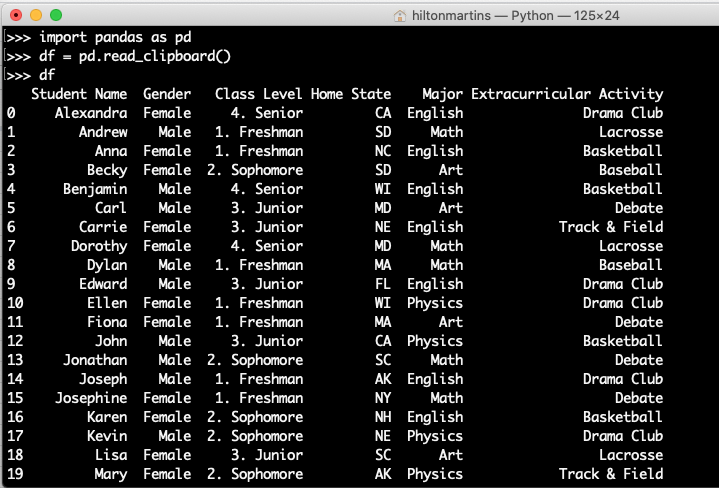

## Importando dados delimitados - CSV

- Dados delimitados são arquivos de texto com cada elemento de uma linha é
  separado por algum caractere especial. 
- Tradicionalmente é usado a "vírgula" como caractere delimitador, de modo que esse tipo de arquivo de dados ficou conhecido como CSV (comma separeted values).
- No entanto, podemos criar arquivos de dados delimitados usando outros separadores como: "|", ";", etc...


## Método `.read_csv`

- No pandas usaremos o método `.read_csv` para a importação de dados provenientes desses tipos de arquivos.

```
import pandas as pd
help(pd.read_csv)
```

- Documentação online: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

### Exemplo de um arquivo de dados CSV

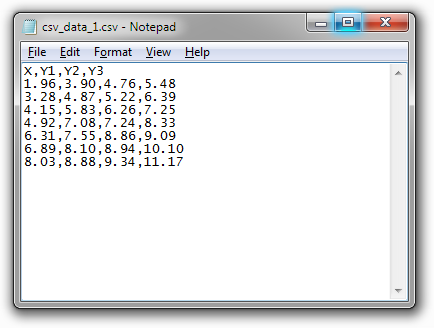


**Exemplo** - carregando dados delimitados por ponto-e-vírgula oriundos do sistema de Finanças Municipais para o estado da Paraíba no ano de 2015.

- FINBRA - https://www.gov.br/tesouronacional/pt-br/estados-e-municipios/dados-consolidados/finbra-financas-municipais

- O arquivo de dados se acha no diretório compartilha desse curso do Gdrive.

In [ ]:
# Qual é atual diretório de trabalho?
import os
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Listando todos os arquivos
os.listdir()


- Vamos ler os dados do arquivo `finbraPB2015.csv`

In [ ]:
# Carregamos o pacote pandas
import pandas as pd

# Já com diretório de trabalho definido, importamos o arquivo pelo nome
# Informamos o separador correto
df = pd.read_csv('finbraPB2015.csv', sep = ';')
df

,codmun,desmun,pop,conta,valor
0,2510659,Parari,1809,Legislativa,"560476,39"
1,2510659,Parari,1809,Administração,"2763645,59"
2,2510659,Parari,1809,Assistência Social,"527276,59"
3,2510659,Parari,1809,Saúde,"2064774,50"
4,2510659,Parari,1809,Educação,"1908066,46"
...,...,...,...,...,...
2488,2506905,Itabaiana,24613,Gestão Ambiental,"105597,43"
2489,2506905,Itabaiana,24613,Agricultura,"388035,63"
2490,2506905,Itabaiana,24613,Indústria,"192315,82"
2491,2506905,Itabaiana,24613,Desporto e Lazer,"15789,00"


In [ ]:
type(df)

pandas.core.frame.DataFrame

## Resumo de linhas

- Método `.head()` e método `.tail()`.

In [ ]:
# Imprimir as primeiras 5 linhas
df.head()

In [ ]:
# Imprimir as primeiras 20 linhas
df.head(20)

,codmun,desmun,pop,conta,valor
0,2510659,Parari,1809,Legislativa,"560476,39"
1,2510659,Parari,1809,Administração,"2763645,59"
2,2510659,Parari,1809,Assistência Social,"527276,59"
3,2510659,Parari,1809,Saúde,"2064774,50"
4,2510659,Parari,1809,Educação,"1908066,46"
5,2510659,Parari,1809,Cultura,"113103,00"
6,2510659,Parari,1809,Urbanismo,"39610,96"
7,2510659,Parari,1809,Gestão Ambiental,"29215,00"
8,2510659,Parari,1809,Agricultura,"302424,73"
9,2510659,Parari,1809,Desporto e Lazer,"47826,93"


In [ ]:
# Imprimir as últimas 5 linhas
df.tail()

,codmun,desmun,pop,conta,valor
2483,2506905,Itabaiana,24613,Saúde,"11510198,13"
2484,2506905,Itabaiana,24613,Trabalho,"217779,07"
2485,2506905,Itabaiana,24613,Educação,"11729807,83"
2486,2506905,Itabaiana,24613,Cultura,"575819,84"
2487,2506905,Itabaiana,24613,Urbanismo,"4005884,61"
2488,2506905,Itabaiana,24613,Gestão Ambiental,"105597,43"
2489,2506905,Itabaiana,24613,Agricultura,"388035,63"
2490,2506905,Itabaiana,24613,Indústria,"192315,82"
2491,2506905,Itabaiana,24613,Desporto e Lazer,"15789,00"
2492,2506905,Itabaiana,24613,Encargos Especiais,"1115606,53"


In [ ]:
# Imprimir as últimas 10 linhas
df.tail(10)

,codmun,desmun,pop,conta,valor
2483,2506905,Itabaiana,24613,Saúde,"11510198,13"
2484,2506905,Itabaiana,24613,Trabalho,"217779,07"
2485,2506905,Itabaiana,24613,Educação,"11729807,83"
2486,2506905,Itabaiana,24613,Cultura,"575819,84"
2487,2506905,Itabaiana,24613,Urbanismo,"4005884,61"
2488,2506905,Itabaiana,24613,Gestão Ambiental,"105597,43"
2489,2506905,Itabaiana,24613,Agricultura,"388035,63"
2490,2506905,Itabaiana,24613,Indústria,"192315,82"
2491,2506905,Itabaiana,24613,Desporto e Lazer,"15789,00"
2492,2506905,Itabaiana,24613,Encargos Especiais,"1115606,53"


## Tipagem das colunas 

- Método `.dtypes` - acessar a tipagem das colunas.


|Pandas dtype|	Python type|	NumPy type|	Usage|
|---|---|---|---|
|object|	str or mixed|	string_, unicode_, mixed types|	Text or mixed numeric and non-numeric values|
|int64|	int|	int_, int8, int16, int32, int64, uint8, uint16, uint32, uint64|	Integer numbers|
|float64|	float|	float_, float16, float32, float64|	Floating point numbers|
|bool|	bool|	bool_	| True/False values|
|datetime64|	NA|	datetime64[ns]|	Date and time values|
|timedelta[ns]|	NA|	NA|	Differences between two datetimes|
|category|	NA|	NA|	Finite list of text values|

In [ ]:
# Verificar a tipagem dos dados
df.dtypes

codmun     int64
desmun    object
pop        int64
conta     object
valor     object
dtype: object

## Especificando o separador de decimal em colunas numéricas

- **Exemplo** - importar dados delimitados especificando o separador de decimal para colunas numéricas. Vamos ler os dados do arquivo `finbraPB2015.csv`.

In [ ]:
# Carregamos o pacote pandas
import pandas as pd

# Já com diretório de trabalho definido, importamos o arquivo pelo nome
# Informamos o separador de texto correto e o separador de decimal
df = pd.read_csv('finbraPB2015.csv', sep = ';', decimal= ',')

# Imprimir as primeiras 5 linhas
df.head()

,codmun,desmun,pop,conta,valor
0,2510659,Parari,1809,Legislativa,560476.39
1,2510659,Parari,1809,Administração,2763645.59
2,2510659,Parari,1809,Assistência Social,527276.59
3,2510659,Parari,1809,Saúde,2064774.50
4,2510659,Parari,1809,Educação,1908066.46


In [ ]:
# Verificar a tipagem dos dados
# Note que o tipo do campo "valor" agora é númerico.
df.dtypes

codmun      int64
desmun     object
pop         int64
conta      object
valor     float64
dtype: object

**Exemplo** - Método `.info()` - fazer um sumário do data frame.

In [ ]:
# Verificar o consumo de memória e outras informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2493 entries, 0 to 2492
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   codmun  2493 non-null   int64  
 1   desmun  2493 non-null   object 
 2   pop     2493 non-null   int64  
 3   conta   2493 non-null   object 
 4   valor   2493 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 97.5+ KB


## Especificando a leitura de cabeçalho de dados

**Exemplo** - importar dados delimitados ignorando a primeira linha como nomes das colunas `finbraPB2015.csv`.

In [ ]:
# Importamos o arquivo de dados CSV, pulamos a primeira linha e informamos
# que a próxima linha não é cabeçalho de colunas
df = pd.read_csv('finbraPB2015.csv', sep = ';',decimal=',', header=None, skiprows=1)
df

,0,1,2,3,4
0,2510659,Parari,1809,Legislativa,560476.39
1,2510659,Parari,1809,Administração,2763645.59
2,2510659,Parari,1809,Assistência Social,527276.59
3,2510659,Parari,1809,Saúde,2064774.50
4,2510659,Parari,1809,Educação,1908066.46
...,...,...,...,...,...
2488,2506905,Itabaiana,24613,Gestão Ambiental,105597.43
2489,2506905,Itabaiana,24613,Agricultura,388035.63
2490,2506905,Itabaiana,24613,Indústria,192315.82
2491,2506905,Itabaiana,24613,Desporto e Lazer,15789.00


**Exemplo** - importar dados delimitados ignorando a primeira linha como nomes das colunas. Contudo, passaremos os nomes das colunas customizados - `finbraPB2015.csv`.

In [ ]:

# Criamos uma lista de nomes das colunas
colnames = ["cod_ibge", "nome", "populacao", "esfera", "total"]

# Importamos o arquivo de dados CSV, pulamos a primeira linha e informamos
# que a próxima linha não é cabeçalho de colunas
df = pd.read_csv('finbraPB2015.csv', sep = ';',decimal=',', header=None, 
                 skiprows=1, names = colnames)
df


,cod_ibge,nome,populacao,esfera,total
0,2510659,Parari,1809,Legislativa,560476.39
1,2510659,Parari,1809,Administração,2763645.59
2,2510659,Parari,1809,Assistência Social,527276.59
3,2510659,Parari,1809,Saúde,2064774.50
4,2510659,Parari,1809,Educação,1908066.46
...,...,...,...,...,...
2488,2506905,Itabaiana,24613,Gestão Ambiental,105597.43
2489,2506905,Itabaiana,24613,Agricultura,388035.63
2490,2506905,Itabaiana,24613,Indústria,192315.82
2491,2506905,Itabaiana,24613,Desporto e Lazer,15789.00


## Importando dados de planilhas Excel

- Dados arquivados em planilhas Excel são bastante populares.


## Método `.read_excel`

- No pandas usaremos o método `.read_excel` para a importação de dados provenientes desses tipos de arquivos.

```
import pandas as pd
help(pd.read_excel)
```

- Documentação online: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html

In [ ]:
# Qual é atual diretório de trabalho?
import os
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Listando todos os arquivos
os.listdir()

**Exemplo** - Vamos importar o aquivo `pesquisa_familiar.xlsx` no diretório do curso.

- Esses dados foram extraídos da **Pesquisa de Orçamentos Familiares - POF** do IBGE. 
- https://www.ibge.gov.br/estatisticas/sociais/educacao/9050-pesquisa-de-orcamentos-familiares.html?=&t=o-que-e

In [ ]:
# Importar arquivo Excel e atribuir à variável df
df = pd.read_excel('pesquisa_familiar.xlsx')

# Imprimir as 10 primeiras linhas
df.head(n=10)



,ano,id_dom,individuo,sexo,idade,anos_estudo,renda_trabalho,consumo_vite,obeso
0,2014,1,2,M,35,3,724,6.88,F
1,2014,5,2,F,21,0,790,9.60,F
2,2014,3,1,F,32,5,1200,8.69,T
3,2014,6,2,F,52,7,1800,10.78,T
4,2014,7,1,M,27,7,1800,12.14,T
5,2014,1,1,F,52,11,2400,5.53,F
6,2014,8,1,F,54,15,3000,12.21,T
7,2014,5,3,F,56,12,3200,2.78,T
8,2014,6,1,M,20,9,3200,0.64,T
9,2014,2,1,M,54,12,4124,9.20,F


## Especificando a planilha (aba) objeto XLSX

**Exemplo** - Vamos importar o aquivo `pesquisa_familiar.xlsx` no diretório do curso, agora especificando a planilha (aba) a ser importada.

In [ ]:
# Importar arquivo Excel e atribuir à variável df
df = pd.read_excel('pesquisa_familiar.xlsx', sheet_name="DOM")

# Imprimir as 10 primeiras linhas
df.head(n=10)

,ano,id_dom,urbana,saneamento,tipo_moradia,telefone_fixo
0,2014,1,F,F,CASA,T
1,2014,2,F,F,CASA,T
2,2014,3,T,F,APARTAMENTO,F
3,2014,4,T,F,APARTAMENTO,T
4,2014,5,T,T,APARTAMENTO,T
5,2014,6,T,T,CASA,T
6,2014,7,T,T,CASA,T
7,2014,8,T,T,APARTAMENTO,T
8,2014,9,T,F,CASA,T
9,2014,10,T,F,CASA,F


## Especificando a planilha (aba) e colunas a serem importadas do objeto XLSX

**Exemplo** - Vamos importar o aquivo `pesquisa_familiar.xlsx` no diretório do curso, agora especificando nomes das colunas a serem importadas e a planilha (aba).


In [ ]:
# Importar arquivo Excel e atribuir à variável df
df = pd.read_excel('pesquisa_familiar.xlsx',
                   usecols=['id_dom', 'individuo', 'idade'],
                   sheet_name="PES")

# Ver as 5 primeiras linhas
df.head(n=5)

,id_dom,individuo,idade
0,1,2,35
1,5,2,21
2,3,1,32
3,6,2,52
4,7,1,27


## Importando dados de arquivo de texto com colunas fixas (posição e tamanho)

- **Dados arquivados em formato de texto fixo por colunas** ainda é uma formato
  que pode ser achado em diversos provedores.

- Os arquivos de texto fixados por colunas geralmente são providos com arquivos auxiliares - dicionários de variáveis como informações sobre:
  - O **tamanho** ocupado por cada coluna/campo no arquivo de texto.
  - A **posição inicial** da coluna onde o campo inicia.
  - A **posição final** da coluna onde o campo terminal


## Método `.read_fwf`

- No pandas usaremos o método `.read_fwf` para a importação de dados provenientes desses tipos de arquivos.

```
import pandas as pd
help(pd.read_fwf)
```

- Documentação online: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html

**Exemplo** - Importar arquivo de dados da Pesquisa Nacional por Amostra de Domicílio (Anual) de 2014 - IBGE.

- https://www.ibge.gov.br/estatisticas/sociais/educacao/9127-pesquisa-nacional-por-amostra-de-domicilios.html?=&t=o-que-e

- Observe que no arquivo de dicionário apenas são informados os campos de posição inicial e tamanho de cada coluna. 
- Para facilitar, criaremos uma função auxiliar que converterá as informações de posição inicial e tamanho para posição incial e posição final na forma do pandas.

Dicionário de dados: https://docs.google.com/spreadsheets/d/1JNwSr7E7vGrzZv6mQQ0d_-dbPPS9yEl7


In [ ]:
# Qual é atual diretório de trabalho?
import os
os.getcwd()

# Definir diretório de trabalho para a pasta compartilhada
os.chdir('/content/drive/Shared drives/DS-PY/')

# Listando todos os arquivos
os.listdir()

## Especificando o tamanho das colunas

- Especificamos sequencialmente o tamanho de cada coluna que queremos importar. Informamos os nomes que desejamos atribuir a cada coluna importada 

In [ ]:
# Importar o pandas
import pandas as pd

# Importar arquivo de texto com colunas fixas
# Informamos sequencialmente o tamanho de cada coluna que queremos importar
# Informamos os nomes que desejamos atribuir a cada coluna importada
df = pd.read_fwf('pnad_anual_2014/PES2014.txt',
                 widths = [4,2],
                 names = ['ano', 'uf'])
# Ver primeiras linhas
df

,ano,uf
0,2014,25
1,2014,25
2,2014,25
3,2014,25
4,2014,25
...,...,...
6334,2014,25
6335,2014,25
6336,2014,25
6337,2014,25


## Especificando a posição inicial e a posição final de cada coluna a ser importada

**Exemplo** - Importar arquivo de dados da Pesquisa Nacional por Amostra de Domicílio (Anual) de 2014 - IBGE usando informações sobre a posição incial de 
cada coluna e a posição final.

- No Python, a indexação de cada coluna começa com o índice 0. 
- O arquivo de dicionário do IBGE não informa a posição final. Portanto, usaremos posição final =  posição inicial + tamanho da coluna.
- Precisaremos criar uma função anômica para ajustar a indexação das colunas.




In [ ]:
# Criamos uma lista de tuplas com (inicio, tamanho) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_tamanho = [(1,4), (5,2), (18,1), (27,3), (33,1)]

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=begin+size)
inicio_final = lambda lista: [ (s[0] - 1, s[0] - 1 + s[1] ) for s in lista ]

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = inicio_final(inicio_tamanho)

# Posição final e posição final indexadas para o pandas
posicao


[(0, 4), (4, 6), (17, 18), (26, 29), (32, 33)]

In [ ]:
# Criamos uma lista de nomes para os campos importados
nomes = ['ano', 'uf', 'sexo', 'idade', 'cor']

# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('pnad_anual_2014/PES2014.txt',
                 colspecs = posicao,
                 names = nomes)
# Ler primeiras linhas
df.head()

,ano,uf,sexo,idade,cor
0,2014,25,4,86,8
1,2014,25,4,46,8
2,2014,25,2,13,8
3,2014,25,2,10,2
4,2014,25,4,81,8


**Exemplo** - Importar arquivo de **micro dados do Censo Demográfico de 2010** - IBGE usando informações sobre a posição incial de 
cada coluna e a posição final.

- https://www.ibge.gov.br/estatisticas/sociais/populacao/25089-censo-1991-6.html?=&t=o-que-e

- Dicionário de dados: https://docs.google.com/spreadsheets/d/1AMDHmgoVRZqpB6rGvL04MQtUUwCA-PIL

- Observe que no arquivo de dicionário  são informados os campos de posição inicial, posição final, digitos inteiros e dígitos decimais de cada coluna. 
- Para facilitar, criaremos uma função auxiliar que converterá as informações de posição inicial e tamanho para posição incial e posição final na forma do pandas.
- Vamos importar as variável de peso amostral que possui valores decimais.
- Para conferência da população total em 2010: https://pt.wikipedia.org/wiki/Demografia_da_Para%C3%ADba

In [ ]:
# Lista de nomes
nomes = ['uf', 'peso_amostral', 'sexo', 'cor', 'idade']

# Criamos uma lista de tuplas com (inicio, final) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_final = [(1,2), (29,44), (58,58), (68,68), (62,64)]

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=final)
conv_posicao = lambda lista: [ (s[0]-1,s[1]) for s in lista ]

# Vamos converter a coluna peso amostral para float
# e dividir por 10^13, onde 13 é total de dígitos decimais
# informados no dicionário de dados
conv_nomes = {'peso_amostral': lambda x: float(x)/10**13}

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = conv_posicao(inicio_final)

# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('censo_demografico_2010/Amostra_Pessoas_25.txt',
                 colspecs = posicao,
                 names = nomes, 
                 converters=conv_nomes
                 )
# Ler primeiras linhas
print(df.dtypes)
print(df)
# População total da PB - somamos o peso de cada pessoa na amostra
print(f"População total: {df['peso_amostral'].sum():.0f}")
df

uf                 int64
peso_amostral    float64
sexo               int64
cor                int64
idade              int64
dtype: object
        uf  peso_amostral  sexo  cor  idade
0       25       4.960883     1    1     34
1       25       4.960883     2    1      1
2       25       4.960883     2    1      5
3       25       4.960883     2    4     28
4       25       4.945709     1    4     13
...     ..            ...   ...  ...    ...
571626  25       2.520554     2    1     29
571627  25       2.520554     1    1      9
571628  25       2.520554     2    1      7
571629  25       1.889369     1    4     64
571630  25       1.889369     1    4     24

[571631 rows x 5 columns]
População total: 3766528


,uf,peso_amostral,sexo,cor,idade
0,25,4.960883,1,1,34
1,25,4.960883,2,1,1
2,25,4.960883,2,1,5
3,25,4.960883,2,4,28
4,25,4.945709,1,4,13
...,...,...,...,...,...
571626,25,2.520554,2,1,29
571627,25,2.520554,1,1,9
571628,25,2.520554,2,1,7
571629,25,1.889369,1,4,64


## Importando dados de arquivo de JSON providos por API

- Dados arquivados em formato JSON (JavaScript Object Notation) estão cada vez mais populares e tendem a se tornar padrão nos próximos anos em razão da difusão de serviços web de API (Application Programming Interface).

## Arquivo JSON

```
{
  "chave1": ...,
  "chave2": ...,
  ...
  "chaveR": ...,

}
```

## Método `.read_json`

- No pandas usaremos o método `.read_json` para a importação de dados provenientes desses tipos de arquivos.

```
import pandas as pd
help(pd.read_json)
```

- Documentação online: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html

## Requisitando dados de API

- No Python um dos pacote mais usados para requisição de dados de API é o `requests` por meio do método `GET`.

```
pip3 install requests
```

**Exemplo** - Lendo um arquivo JSON com diferentes orientações.

In [ ]:
# Importar pandas
import pandas as pd

# Criamos uma string no formato de uma lista - 
# Observe que cada entrada da lista é um objeto JSON.
# Similar a uma lista de dicionários 
my_json = """[
    {
        "type": "business",
        "uuid": "199bca3e-baf6-11e6-861b-0ad881f403bf",
        "size": 918
    },
    {
        "type": "business",
        "uuid": "054a7650-b36a-11e6-a734-122e0737977d",
        "size": 984
    }
]"""

pd.read_json(my_json)

,type,uuid,size
0,business,199bca3e-baf6-11e6-861b-0ad881f403bf,918
1,business,054a7650-b36a-11e6-a734-122e0737977d,984


In [ ]:
# Importar pandas
import pandas as pd

# Criamos uma string no formato JSON
json = """[
      {
        "data": "2010-01-02",
        "total": 112,
        "valor": 12345
      },
      {
        "data": "2010-01-12",
        "total": 134,
        "valor": 9345
      }
]"""

pd.read_json(json) 

,data,total,valor
0,2010-01-02,112,12345
1,2010-01-12,134,9345


**Exemplo** - Requisitando dados JSON de API

- API serviço de Dados abertos da Secretaria do Tesouro Nacional:
  http://apidatalake.tesouro.gov.br/docs/siconfi/

- Informações básicas dos entes da federação.

In [ ]:
from requests import get

# Endereço e parâmetros de requisição
url = "http://apidatalake.tesouro.gov.br/ords/siconfi/tt/entes"

# Requisição GET e codificar retorno para JSON
data = get(url).json()

#print(data)

# Filtramos apenas a lista de objetos JSON - já convertemos para 
# uma lista de dicionários python.
data = data.get("items")
print(data)

[{'cod_ibge': 1718659, 'ente': 'Rio da Conceição', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao': 2130, 'cnpj': '33262536000134'}, {'cod_ibge': 1718709, 'ente': 'Rio dos Bois', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao': 2834, 'cnpj': '37420932000101'}, {'cod_ibge': 1718758, 'ente': 'Rio Sono', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao': 6478, 'cnpj': '00000729000168'}, {'cod_ibge': 1718808, 'ente': 'Sampaio', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao': 4711, 'cnpj': '25086828000135'}, {'cod_ibge': 1718840, 'ente': 'Sandolândia', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao': 3375, 'cnpj': '37344355000108'}, {'cod_ibge': 1718865, 'ente': 'Santa Fé do Araguaia', 'capital': '0  ', 'regiao': 'CO', 'uf': 'TO', 'esfera': 'M', 'exercicio': 2020, 'populacao'

In [ ]:
# Convertemos a lista de dicionário python para pandas data frame
# Usando o método .DataFrame()
df = pd.DataFrame(data)
df.head()

,cod_ibge,ente,capital,regiao,uf,esfera,exercicio,populacao,cnpj
0,1718659,Rio da Conceição,0,CO,TO,M,2020,2130,33262536000134
1,1718709,Rio dos Bois,0,CO,TO,M,2020,2834,37420932000101
2,1718758,Rio Sono,0,CO,TO,M,2020,6478,00000729000168
3,1718808,Sampaio,0,CO,TO,M,2020,4711,25086828000135
4,1718840,Sandolândia,0,CO,TO,M,2020,3375,37344355000108


**Exemplo** - Requisitando dados JSON de API

- API serviço de Dados abertos da Secretaria do Tesouro Nacional:
  http://apidatalake.tesouro.gov.br/docs/siconfi/

- Lista de dados contidos nos quadros dos anexos do Relatório Resumido de Execução Orçamentária - RREO para um ente e período específicos. Paraíba/2019

In [ ]:
from requests import get

# Endereço e parâmetros de requisição
url = "http://apidatalake.tesouro.gov.br/ords/siconfi/tt/rreo?an_exercicio=2019&nr_periodo=1&co_tipo_demonstrativo=RREO&id_ente=25"

# Requisição GET e codificar retorno para JSON
data = get(url).json()


# Filtramos apenas a lista de objetos JSON.
data = data.get("items")

# Convertemos o objeto lista de dicionários para pandas data frame
df = pd.DataFrame(data)
df

,exercicio,demonstrativo,periodo,periodicidade,instituicao,cod_ibge,uf,populacao,anexo,rotulo,coluna,cod_conta,conta,valor
0,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 01,Padrão,PREVISÃO INICIAL,ReceitasExcetoIntraOrcamentarias,RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I),1.055526e+10
1,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 01,Padrão,PREVISÃO ATUALIZADA (a),ReceitasExcetoIntraOrcamentarias,RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I),1.061557e+10
2,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 01,Padrão,No Bimestre (b),ReceitasExcetoIntraOrcamentarias,RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I),1.888579e+09
3,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 01,Padrão,% (b/a),ReceitasExcetoIntraOrcamentarias,RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I),1.779000e+01
4,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 01,Padrão,Até o Bimestre (c),ReceitasExcetoIntraOrcamentarias,RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I),1.888579e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3426,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 14,Padrão,% Mínimo a Aplicar no Exercício,MinimoAnualDoFUNDEBNaRemuneracaoDoMagisterioCo...,Mínimo Anual de 60% do FUNDEB na Remuneração d...,6.000000e+01
3427,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 14,Padrão,% Aplicado Até o Bimestre,MinimoAnualDoFUNDEBNaRemuneracaoDoMagisterioCo...,Mínimo Anual de 60% do FUNDEB na Remuneração d...,6.421000e+01
3428,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 14,Padrão,Valor Apurado Até o Bimestre,AplicacaoTotalDasDespesasComAcoesEServicosPubl...,Despesas com Ações e Serviços Públicos de Saúd...,1.066815e+08
3429,2019,RREO,1,B,Governo do Estado da Paraíba,25,PB,3996496,RREO-Anexo 14,Padrão,% Mínimo a Aplicar no Exercício,AplicacaoTotalDasDespesasComAcoesEServicosPubl...,Despesas com Ações e Serviços Públicos de Saúd...,1.200000e+01


# Importando dados de sistemas gerenciadores de banco de dados

- O python suporta conexão com vários gerenciadores de banco de dados.

- O exemplo abaixo usa um dos SGDB mais conhecidos: PostgreSQL.

- Vamos precisar importar o pacote `psycopg2`.

- No pandas vamos precisar do método `.read_sql`:
```
import pandas as pd
help(pd.read_sql)
```

- A figura abaixo apresenta um modelo relacional do banco de dados de cidades do mundo.


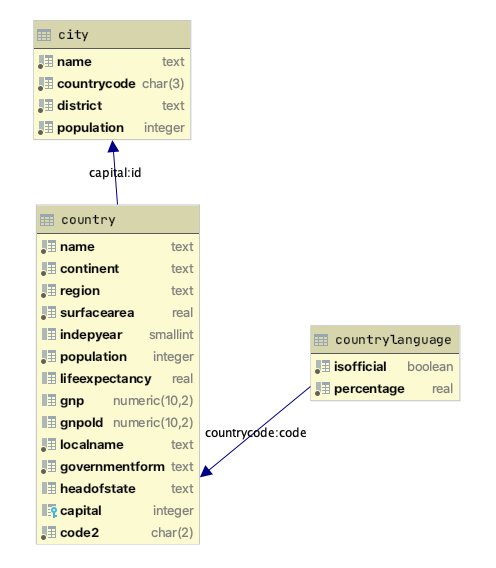

In [ ]:
# !pip3 install psycopg2-binary
import psycopg2

# Credenciais para acesso ao banco de dados
user = 'zwopculunlrnqy'
db = 'd25adt95asvqo7'
host = 'ec2-3-210-178-167.compute-1.amazonaws.com'
password = '856583bb95a951fbcd886ab2ae373cbe85e1bf4194fe1954023582065aa95239'
port = 5432

# Abrir conexão com banco de dados
cred = f"host={host} port={port} dbname={db} user={user} password={password}"
conn = psycopg2.connect(cred)



/usr/local/lib/python3.6/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


#### Selecionamos dados de uma tabela usando a linguagem SQL

- Linguagem SQL: https://pt.wikipedia.org/wiki/SQL
- Usamos o método `.read_sql` para converter em data frame

In [ ]:
# Aqui usamos um comando de seleção limitada as 100 primeiras linhas
# Linguagem SQL
sql_command = f"SELECT * FROM city LIMIT 500;"
print(sql_command)

# Carregamos os dados e convertemos para um objeto pandas data frame
data = pd.read_sql(sql_command, conn)
data


SELECT * FROM city LIMIT 500;


,id,name,countrycode,district,population
0,15,Enschede,NLD,Overijssel,149544
1,16,Haarlem,NLD,Noord-Holland,148772
2,17,Almere,NLD,Flevoland,142465
3,18,Arnhem,NLD,Gelderland,138020
4,19,Zaanstad,NLD,Noord-Holland,135621
...,...,...,...,...,...
495,510,Slough,GBR,England,112000
496,511,Exeter,GBR,England,111000
497,512,Cheltenham,GBR,England,106000
498,513,Gloucester,GBR,England,107000


#### Selecionamos dados de uma tabela usando a linguagem SQL

 - Usamos SQL para consultar duas tabelas do banco de dados fazendo uma junção interna a partir de chaves de relação, selecionado campos específicos.

- Usamos o método `.read_sql` para converter em data frame.

In [ ]:
sql_command = f"SELECT country.name AS country, country.population, city.name AS city FROM city INNER JOIN country ON city.id = country.capital LIMIT 100;"
print(sql_command)

# Load the data
data = pd.read_sql(sql_command, conn)
data

SELECT country.name AS country, country.population, city.name AS city FROM city INNER JOIN country ON city.id = country.capital LIMIT 100;


,country,population,city
0,Albania,3401200,Tirana
1,Algeria,31471000,Alger
2,Angola,12878000,Luanda
3,Antigua and Barbuda,68000,Saint John�s
4,United Arab Emirates,2441000,Abu Dhabi
5,Argentina,37032000,Buenos Aires
6,Armenia,3520000,Yerevan
7,Australia,18886000,Canberra
8,Azerbaijan,7734000,Baku
9,Bahamas,307000,Nassau


# Importando dados oriundos de softwares de estatística computacional

- O python suporta importação de arquivos de dados produzidos por softwares estatísticos mais conhecidos.

- O método `.read_stata` ler arquivos `.dta` do software STATA.
- O método `.read_spss` ler arquivos exportados pelo do software SPSS.
- O método `.read_sas` ler arquivos exportados pelo do software SAS.

```
import pandas as pd
help(pd.read_stata)
```

**Exemplo** - importar dados de arquivo dta do STATA.

- Usamos o método `.read_stata`.

In [ ]:
# Importar pandas
import pandas as pd

# Ler arquivo dta
df = pd.read_stata('auto.dta')
df.head(n=10)


,make,price,mpg,rep78,headroom,trunk,weight,length,turn,displacement,gear_ratio,foreign
0,AMC Concord,4099,22,3.0,2.5,11,2930,186,40,121,3.58,Domestic
1,AMC Pacer,4749,17,3.0,3.0,11,3350,173,40,258,2.53,Domestic
2,AMC Spirit,3799,22,NaN,3.0,12,2640,168,35,121,3.08,Domestic
3,Buick Century,4816,20,3.0,4.5,16,3250,196,40,196,2.93,Domestic
4,Buick Electra,7827,15,4.0,4.0,20,4080,222,43,350,2.41,Domestic
5,Buick LeSabre,5788,18,3.0,4.0,21,3670,218,43,231,2.73,Domestic
6,Buick Opel,4453,26,NaN,3.0,10,2230,170,34,304,2.87,Domestic
7,Buick Regal,5189,20,3.0,2.0,16,3280,200,42,196,2.93,Domestic
8,Buick Riviera,10372,16,3.0,3.5,17,3880,207,43,231,2.93,Domestic
9,Buick Skylark,4082,19,3.0,3.5,13,3400,200,42,231,3.08,Domestic


**Exemplo** - importar dados de arquivo .sav do SPSS/IBM.

- - Usamos o método `.read_spss`.
- Precisamos instalar um pacote dependente: 


```
pip3 install pyreadstat
```

In [ ]:
# Instalar pacote no notebook
!pip3 install pyreadstat

# Importar pandas
import pandas as pd

# Ler arquivo dta
df = pd.read_spss('accidents.sav')
df.head(n=10)

     |████████████████████████████████| 2.0MB 2.8MB/s 


,agecat,gender,accid,pop
0,Under 21,Female,57997.0,198522.0
1,21-25,Female,57113.0,203200.0
2,26-30,Female,54123.0,200744.0
3,Under 21,Male,63936.0,187791.0
4,21-25,Male,64835.0,195714.0
5,26-30,Male,66804.0,208239.0


**Exemplo** - importar dados de arquivo .rds da linguagem de estatística computacional R.

- - Usamos o pacote `pyreadr` e o método `.read_r`.
- Precisamos instalar o pacote:

```
pip3 install pyreadr
```

In [ ]:
# Instalar pacote no notebook
! pip3 install pyreadr

# Importar pacote
import pyreadr as pr
import pandas as pd

# Importar arquivo R rds como dicionário ordenado
data = pr.read_r("chicago.rds")

# Convertendo para pandas dataframe
data = list(data.values())[0]
data.info()
data

     |████████████████████████████████| 634kB 2.7MB/s 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6940 entries, 0 to 6939
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        6940 non-null   object 
 1   tmpd        6939 non-null   float64
 2   dptp        6938 non-null   float64
 3   date        6940 non-null   object 
 4   pm25tmean2  2493 non-null   float64
 5   pm10tmean2  6698 non-null   float64
 6   o3tmean2    6940 non-null   float64
 7   no2tmean2   6940 non-null   float64
dtypes: float64(6), object(2)
memory usage: 433.9+ KB


,city,tmpd,dptp,date,pm25tmean2,pm10tmean2,o3tmean2,no2tmean2
0,chic,31.5,31.500,1987-01-01,NaN,34.000000,4.250000,19.988095
1,chic,33.0,29.875,1987-01-02,NaN,NaN,3.304348,23.190994
2,chic,33.0,27.375,1987-01-03,NaN,34.166667,3.333333,23.815476
3,chic,29.0,28.625,1987-01-04,NaN,47.000000,4.375000,30.434524
4,chic,32.0,28.875,1987-01-05,NaN,NaN,4.750000,30.333333
...,...,...,...,...,...,...,...,...
6935,chic,40.0,33.600,2005-12-27,23.560000,27.000000,4.468750,23.500000
6936,chic,37.0,34.500,2005-12-28,17.750000,27.500000,3.260417,19.285628
6937,chic,35.0,29.400,2005-12-29,7.450000,23.500000,6.794837,19.972222
6938,chic,36.0,31.000,2005-12-30,15.057143,19.200000,3.034420,22.805556


# Exportação de dados

- O python permite a exportação de objetos data frames para arquivos de dados.

- Os formatos mais usados são: CSV, Excel, JSON etc.

- Alguns exemplos abaixo:



In [ ]:
# Importar pacote pandas com apelido
import pandas as pd 

# Criamos um dicionário que coleciona listas.
# Note que as chaves serão usadas como os nomes das colunas
# do data frame
data = {'Nome':['João', 'Maria', 'José', 'Carol'], 'Idade':[20, 21, 19, 18]}

# Convertemos o dicionário acima para um objeto data frame
# Nesse caso, o pandas usará as chaves como os nomes das colunas
# do data frame
df = pd.DataFrame(data) 

# Exibir dataframe
df 

,Nome,Idade
0,João,20
1,Maria,21
2,José,19
3,Carol,18


In [ ]:
# Exportar dados para CSV

# CSV
df.to_csv('tab_export_1.csv')

# CSV com delimitardor ; e sem indexador de linhas
df.to_csv('tab_export_2.csv', sep=';', index=False)

# Excel indicando planilha e sem indexador de linhas
df.to_excel('tab_export_3.xlsx', index=False, sheet_name='dados')

In [ ]:
# Para JSON
df.to_json()

'{"Nome":{"0":"Jo\\u00e3o","1":"Maria","2":"Jos\\u00e9","3":"Carol"},"Idade":{"0":20,"1":21,"2":19,"3":18}}'

In [ ]:

# Para dicionário python
df.to_dict()

{'Idade': {0: 20, 1: 21, 2: 19, 3: 18},
 'Nome': {0: 'João', 1: 'Maria', 2: 'José', 3: 'Carol'}}

In [ ]:
# Para arquivo de texto latex
df.to_latex('tab_export_4.tex', index=False)

## Referências

- Chen (2018). *Pandas for everyone: python data analysis* Addison-Wesley Professional.
- Marcondes (2018). *Matemática com Python*. São Paulo: Novatec.
- Menezes (2019). *Introdução à programação com Python*. 3 ed. São Paulo: Novatec.
